# Analysis of user collection

In this notebook, the retrieved results of the user collection is analyzed.

In [1]:
import glob
import time
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
fp_figs = Path("figs")

## User collection files

In [3]:
data_files = glob.glob("methods/*/results/*.csv")

data_files

['methods\\github_search\\results\\ids_search_repos.csv',
 'methods\\github_search\\results\\ids_search_users.csv',
 'methods\\github_search\\results\\ids_topic_repos.csv',
 'methods\\papers_with_code\\results\\ids_paperswithcode.csv',
 'methods\\profile_pages\\results\\employees_github_usernames.csv',
 'methods\\pure\\results\\ids_pure_users.csv']

## Dataset
The data contains the source where the GitHub user id is found, the GitHub user id and university id if it is available.

In [4]:
df_github_names_long = pd.concat(
    [ pd.read_csv(fp) for fp in data_files], 
    axis=0, 
    keys=data_files, 
    names=["source", "row"]
).reset_index("source").reset_index(drop=True)
df_github_names_long

,source,github_user_id,uu_user_id
0,methods\github_search\results\ids_search_repos...,jonasmoons,NaN
1,methods\github_search\results\ids_search_repos...,gglucass,NaN
2,methods\github_search\results\ids_search_repos...,MarcelRobeer,NaN
3,methods\github_search\results\ids_search_repos...,UtrechtUniversity,NaN
4,methods\github_search\results\ids_search_repos...,ekatrukha,NaN
...,...,...,...
642,methods\pure\results\ids_pure_users.csv,keesmulder,NaN
643,methods\pure\results\ids_pure_users.csv,RianneSchouten,NaN
644,methods\pure\results\ids_pure_users.csv,ydluo,NaN
645,methods\pure\results\ids_pure_users.csv,marnixnaber,NaN


### Retrieval count

The following results shows how many times user indentifiers are found with each retrieval method. This can be an indicator the findability of users. 

In [5]:
df_name_method_crosstab = pd.crosstab(
    df_github_names_long["github_user_id"],
    df_github_names_long["source"]
)
df_name_method_crosstab

source,methods\github_search\results\ids_search_repos.csv,methods\github_search\results\ids_search_users.csv,methods\github_search\results\ids_topic_repos.csv,methods\papers_with_code\results\ids_paperswithcode.csv,methods\profile_pages\results\employees_github_usernames.csv,methods\pure\results\ids_pure_users.csv
github_user_id,,,,,,
19910101bacon,0,0,0,2,0,0
19giorgosts,0,1,0,0,0,0
4009509,0,1,0,0,0,0
73616e646572,0,0,0,0,1,0
AI4Finance-Foundation,0,0,0,1,0,0
...,...,...,...,...,...,...
ydluo,0,0,0,0,0,1
ystouthart,1,0,1,0,0,0
yuntaoj,0,1,0,0,0,0


The following example shows the findability of the ASReview project (project at Utrecht University).

In [6]:
df_name_method_crosstab.loc['asreview']

source
methods\github_search\results\ids_search_repos.csv              0
methods\github_search\results\ids_search_users.csv              0
methods\github_search\results\ids_topic_repos.csv               7
methods\papers_with_code\results\ids_paperswithcode.csv         0
methods\profile_pages\results\employees_github_usernames.csv    4
methods\pure\results\ids_pure_users.csv                         0
Name: asreview, dtype: int64

In [7]:
df_name_findability = (df_name_method_crosstab > 0).astype(int).sum(axis=1).sort_values(ascending=False)
df_name_findability

github_user_id
J535D165             3
kevin4998            3
UU-Hydro             3
UtrechtUniversity    3
ekatrukha            3
                    ..
isaacalpizar         1
iv4xr-project        1
ivasconcelosUU       1
j00st                1
19910101bacon        1
Length: 494, dtype: int64

In [8]:
df_method_findability = (df_name_method_crosstab > 0).astype(int).sum(axis=0).sort_values(ascending=False)
df_method_findability

source
methods\github_search\results\ids_search_users.csv              262
methods\github_search\results\ids_search_repos.csv              178
methods\profile_pages\results\employees_github_usernames.csv     64
methods\github_search\results\ids_topic_repos.csv                17
methods\pure\results\ids_pure_users.csv                          11
methods\papers_with_code\results\ids_paperswithcode.csv          11
dtype: int64

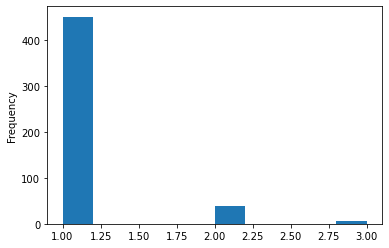

In [9]:
df_name_findability.plot.hist()
plt.savefig(Path(fp_figs, 'user_collection_user_findability.png'))

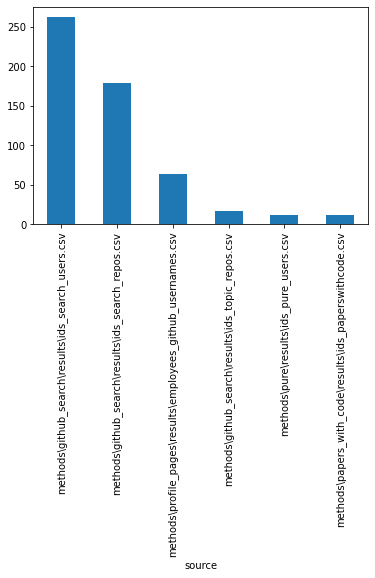

In [10]:
df_method_findability.plot.bar()
plt.savefig(Path(fp_figs, 'user_collection_method_findability.png'))

In [11]:
df_annotated_users = pd.read_excel(Path("results", "unique_users_annotated.xlsx"))
df_annotated_users[["github_user_id", "is_student", "is_employee", "is_currently_employed", "is_research_group", "final_decision"]]

,github_user_id,is_student,is_employee,is_currently_employed,is_research_group,final_decision
0,ReinierMaas,False,0.0,0.0,0.0,0
1,rel=,False,NaN,NaN,NaN,0
2,jhellingman,False,NaN,NaN,NaN,0
3,LucaScorpion,False,NaN,NaN,NaN,0
4,FloatingPoint,False,NaN,NaN,NaN,0
...,...,...,...,...,...,...
424,keesmulder,False,1.0,0.0,NaN,0
425,hanstimm,False,NaN,NaN,0.0,0
426,Jollyfant,False,NaN,NaN,NaN,1
427,growthcharts,False,NaN,NaN,1.0,1


In [12]:
df_annotated_users_included = df_annotated_users[df_annotated_users["final_decision"] == 1]

<AxesSubplot:>

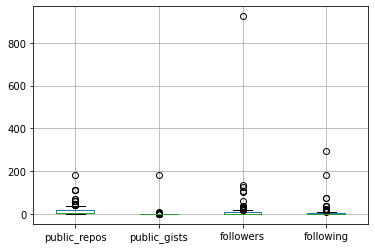

In [13]:
df_annotated_users_included.boxplot(column=['public_repos','public_gists', 'followers', 'following'])


,github_user_id,uu_user_id,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,disk_usage,collaborators,two_factor_authentication,plan,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note
69,brentp,NaN,1739.0,MDQ6VXNlcjE3Mzk=,https://avatars.githubusercontent.com/u/1739?v=4,NaN,https://api.github.com/users/brentp,https://github.com/brentp,https://api.github.com/users/brentp/followers,https://api.github.com/users/brentp/following{...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,UMC
84,UiL-OTS-labs,NaN,8588005.0,MDEyOk9yZ2FuaXphdGlvbjg1ODgwMDU=,https://avatars.githubusercontent.com/u/858800...,NaN,https://api.github.com/users/UiL-OTS-labs,https://github.com/UiL-OTS-labs,https://api.github.com/users/UiL-OTS-labs/foll...,https://api.github.com/users/UiL-OTS-labs/foll...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1.0,1,NaN
44,CLARIAH,MMoatsos,15210767.0,MDEyOk9yZ2FuaXphdGlvbjE1MjEwNzY3,https://avatars.githubusercontent.com/u/152107...,NaN,https://api.github.com/users/CLARIAH,https://github.com/CLARIAH,https://api.github.com/users/CLARIAH/followers,https://api.github.com/users/CLARIAH/following...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1.0,1,NaN
43,CLARIAH,MMoatsos,15210767.0,MDEyOk9yZ2FuaXphdGlvbjE1MjEwNzY3,https://avatars.githubusercontent.com/u/152107...,NaN,https://api.github.com/users/CLARIAH,https://github.com/CLARIAH,https://api.github.com/users/CLARIAH/followers,https://api.github.com/users/CLARIAH/following...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1.0,1,NaN
62,UtrechtUniversity,NaN,11516575.0,MDEyOk9yZ2FuaXphdGlvbjExNTE2NTc1,https://avatars.githubusercontent.com/u/115165...,NaN,https://api.github.com/users/UtrechtUniversity,https://github.com/UtrechtUniversity,https://api.github.com/users/UtrechtUniversity...,https://api.github.com/users/UtrechtUniversity...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1.0,1,NaN
10,cjvanlissa,CJvanLissa,11941251.0,MDQ6VXNlcjExOTQxMjUx,https://avatars.githubusercontent.com/u/119412...,NaN,https://api.github.com/users/cjvanlissa,https://github.com/cjvanlissa,https://api.github.com/users/cjvanlissa/followers,https://api.github.com/users/cjvanlissa/follow...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
50,UUDigitalHumanitieslab,SJJSpoel,7656260.0,MDEyOk9yZ2FuaXphdGlvbjc2NTYyNjA=,https://avatars.githubusercontent.com/u/765626...,NaN,https://api.github.com/users/UUDigitalHumaniti...,https://github.com/UUDigitalHumanitieslab,https://api.github.com/users/UUDigitalHumaniti...,https://api.github.com/users/UUDigitalHumaniti...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1.0,1,NaN
49,UUDigitalHumanitieslab,SJJSpoel,7656260.0,MDEyOk9yZ2FuaXphdGlvbjc2NTYyNjA=,https://avatars.githubusercontent.com/u/765626...,NaN,https://api.github.com/users/UUDigitalHumaniti...,https://github.com/UUDigitalHumanitieslab,https://api.github.com/users/UUDigitalHumaniti...,https://api.github.com/users/UUDigitalHumaniti...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1.0,1,NaN
93,MycrofD,NaN,7660380.0,MDQ6VXNlcjc2NjAzODA=,https://avatars.githubusercontent.com/u/766038...,NaN,https://api.github.com/users/MycrofD,https://github.com/MycrofD,https://api.github.com/users/MycrofD/followers,https://api.github.com/users/MycrofD/following...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN
27,J535D165,JdeBruin1,12981139.0,MDQ6VXNlcjEyOTgxMTM5,https://avatars.githubusercontent.com/u/129811...,NaN,https://api.github.com/users/J535D165,https://github.com/J535D165,https://api.github.com/users/J535D165/followers,https://api.github.com/users/J535D165/followin...,...,1493449.0,0.0,1.0,- name: free\n- space: 976562499\n- collaborat...,False,1.0,1.0,0.0,1,NaN


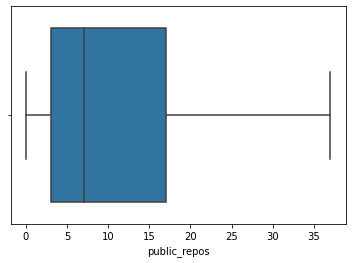

In [14]:
sns.boxplot(x=df_annotated_users_included['public_repos'], showfliers = False)
df_annotated_users_included.sort_values('public_repos', ascending=False).head(10)

,github_user_id,uu_user_id,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,disk_usage,collaborators,two_factor_authentication,plan,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note
69,brentp,NaN,1739.0,MDQ6VXNlcjE3Mzk=,https://avatars.githubusercontent.com/u/1739?v=4,NaN,https://api.github.com/users/brentp,https://github.com/brentp,https://api.github.com/users/brentp/followers,https://api.github.com/users/brentp/following{...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,UMC
85,ekatrukha,YKatrukha,779131.0,MDQ6VXNlcjc3OTEzMQ==,https://avatars.githubusercontent.com/u/779131...,NaN,https://api.github.com/users/ekatrukha,https://github.com/ekatrukha,https://api.github.com/users/ekatrukha/followers,https://api.github.com/users/ekatrukha/followi...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN
103,daob,NaN,65516.0,MDQ6VXNlcjY1NTE2,https://avatars.githubusercontent.com/u/65516?v=4,NaN,https://api.github.com/users/daob,https://github.com/daob,https://api.github.com/users/daob/followers,https://api.github.com/users/daob/following{/o...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
27,J535D165,JdeBruin1,12981139.0,MDQ6VXNlcjEyOTgxMTM5,https://avatars.githubusercontent.com/u/129811...,NaN,https://api.github.com/users/J535D165,https://github.com/J535D165,https://api.github.com/users/J535D165/followers,https://api.github.com/users/J535D165/followin...,...,1493449.0,0.0,1.0,- name: free\n- space: 976562499\n- collaborat...,False,1.0,1.0,0.0,1,NaN
140,norm2782,NaN,19933.0,MDQ6VXNlcjE5OTMz,https://avatars.githubusercontent.com/u/19933?v=4,NaN,https://api.github.com/users/norm2782,https://github.com/norm2782,https://api.github.com/users/norm2782/followers,https://api.github.com/users/norm2782/followin...,...,NaN,NaN,NaN,NaN,False,1.0,0.0,0.0,1,former employee
253,japhir,NaN,10659193.0,MDQ6VXNlcjEwNjU5MTkz,https://avatars.githubusercontent.com/u/106591...,NaN,https://api.github.com/users/japhir,https://github.com/japhir,https://api.github.com/users/japhir/followers,https://api.github.com/users/japhir/following{...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
79,wouter-swierstra,NaN,1588245.0,MDQ6VXNlcjE1ODgyNDU=,https://avatars.githubusercontent.com/u/158824...,NaN,https://api.github.com/users/wouter-swierstra,https://github.com/wouter-swierstra,https://api.github.com/users/wouter-swierstra/...,https://api.github.com/users/wouter-swierstra/...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
87,AJueling,NaN,20947797.0,MDQ6VXNlcjIwOTQ3Nzk3,https://avatars.githubusercontent.com/u/209477...,NaN,https://api.github.com/users/AJueling,https://github.com/AJueling,https://api.github.com/users/AJueling/followers,https://api.github.com/users/AJueling/followin...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
34,leonardovida,LJVida,2588282.0,MDQ6VXNlcjI1ODgyODI=,https://avatars.githubusercontent.com/u/258828...,NaN,https://api.github.com/users/leonardovida,https://github.com/leonardovida,https://api.github.com/users/leonardovida/foll...,https://api.github.com/users/leonardovida/foll...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
113,davidcortesortuno,DICOCortesOrtuno,12200541.0,MDQ6VXNlcjEyMjAwNTQx,https://avatars.githubusercontent.com/u/122005...,NaN,https://api.github.com/users/davidcortesortuno,https://github.com/davidcortesortuno,https://api.github.com/users/davidcortesortuno...,https://api.github.com/users/davidcortesortuno...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN


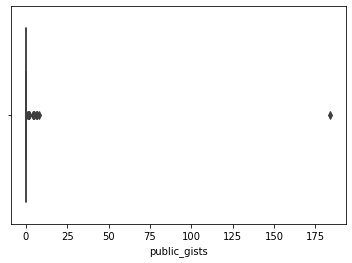

In [15]:
sns.boxplot(x=df_annotated_users_included['public_gists'])
df_annotated_users_included.sort_values('public_gists', ascending=False).head(10)

,github_user_id,uu_user_id,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,disk_usage,collaborators,two_factor_authentication,plan,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note
69,brentp,NaN,1739.0,MDQ6VXNlcjE3Mzk=,https://avatars.githubusercontent.com/u/1739?v=4,NaN,https://api.github.com/users/brentp,https://github.com/brentp,https://api.github.com/users/brentp/followers,https://api.github.com/users/brentp/following{...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,UMC
27,J535D165,JdeBruin1,12981139.0,MDQ6VXNlcjEyOTgxMTM5,https://avatars.githubusercontent.com/u/129811...,NaN,https://api.github.com/users/J535D165,https://github.com/J535D165,https://api.github.com/users/J535D165/followers,https://api.github.com/users/J535D165/followin...,...,1493449.0,0.0,1.0,- name: free\n- space: 976562499\n- collaborat...,False,1.0,1.0,0.0,1,NaN
423,stefvanbuuren,NaN,3919919.0,MDQ6VXNlcjM5MTk5MTk=,https://avatars.githubusercontent.com/u/391991...,NaN,https://api.github.com/users/stefvanbuuren,https://github.com/stefvanbuuren,https://api.github.com/users/stefvanbuuren/fol...,https://api.github.com/users/stefvanbuuren/fol...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
79,wouter-swierstra,NaN,1588245.0,MDQ6VXNlcjE1ODgyNDU=,https://avatars.githubusercontent.com/u/158824...,NaN,https://api.github.com/users/wouter-swierstra,https://github.com/wouter-swierstra,https://api.github.com/users/wouter-swierstra/...,https://api.github.com/users/wouter-swierstra/...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
92,jbikker,NaN,22001552.0,MDQ6VXNlcjIyMDAxNTUy,https://avatars.githubusercontent.com/u/220015...,NaN,https://api.github.com/users/jbikker,https://github.com/jbikker,https://api.github.com/users/jbikker/followers,https://api.github.com/users/jbikker/following...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN
140,norm2782,NaN,19933.0,MDQ6VXNlcjE5OTMz,https://avatars.githubusercontent.com/u/19933?v=4,NaN,https://api.github.com/users/norm2782,https://github.com/norm2782,https://api.github.com/users/norm2782/followers,https://api.github.com/users/norm2782/followin...,...,NaN,NaN,NaN,NaN,False,1.0,0.0,0.0,1,former employee
10,cjvanlissa,CJvanLissa,11941251.0,MDQ6VXNlcjExOTQxMjUx,https://avatars.githubusercontent.com/u/119412...,NaN,https://api.github.com/users/cjvanlissa,https://github.com/cjvanlissa,https://api.github.com/users/cjvanlissa/followers,https://api.github.com/users/cjvanlissa/follow...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
240,PABalland,NaN,19231966.0,MDQ6VXNlcjE5MjMxOTY2,https://avatars.githubusercontent.com/u/192319...,NaN,https://api.github.com/users/PABalland,https://github.com/PABalland,https://api.github.com/users/PABalland/followers,https://api.github.com/users/PABalland/followi...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
74,alexandrosstergiou,AGStergiou,25504317.0,MDQ6VXNlcjI1NTA0MzE3,https://avatars.githubusercontent.com/u/255043...,NaN,https://api.github.com/users/alexandrosstergiou,https://github.com/alexandrosstergiou,https://api.github.com/users/alexandrosstergio...,https://api.github.com/users/alexandrosstergio...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
26,bozso,IBoszo,15000107.0,MDQ6VXNlcjE1MDAwMTA3,https://avatars.githubusercontent.com/u/150001...,NaN,https://api.github.com/users/bozso,https://github.com/bozso,https://api.github.com/users/bozso/followers,https://api.github.com/users/bozso/following{/...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN


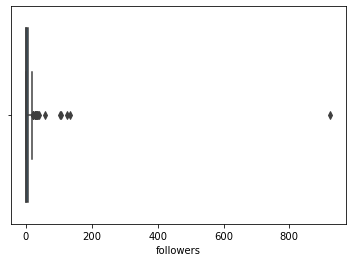

In [16]:
sns.boxplot(x=df_annotated_users_included['followers'])
df_annotated_users_included.sort_values('followers', ascending=False).head(10)

,github_user_id,uu_user_id,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,disk_usage,collaborators,two_factor_authentication,plan,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note
26,bozso,IBoszo,15000107.0,MDQ6VXNlcjE1MDAwMTA3,https://avatars.githubusercontent.com/u/150001...,NaN,https://api.github.com/users/bozso,https://github.com/bozso,https://api.github.com/users/bozso/followers,https://api.github.com/users/bozso/following{/...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN
69,brentp,NaN,1739.0,MDQ6VXNlcjE3Mzk=,https://avatars.githubusercontent.com/u/1739?v=4,NaN,https://api.github.com/users/brentp,https://github.com/brentp,https://api.github.com/users/brentp/followers,https://api.github.com/users/brentp/following{...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,UMC
27,J535D165,JdeBruin1,12981139.0,MDQ6VXNlcjEyOTgxMTM5,https://avatars.githubusercontent.com/u/129811...,NaN,https://api.github.com/users/J535D165,https://github.com/J535D165,https://api.github.com/users/J535D165/followers,https://api.github.com/users/J535D165/followin...,...,1493449.0,0.0,1.0,- name: free\n- space: 976562499\n- collaborat...,False,1.0,1.0,0.0,1,NaN
9,bricker0,BARicker,1919662.0,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
20,hanneoberman,HIOberman,38891540.0,MDQ6VXNlcjM4ODkxNTQw,https://avatars.githubusercontent.com/u/388915...,NaN,https://api.github.com/users/hanneoberman,https://github.com/hanneoberman,https://api.github.com/users/hanneoberman/foll...,https://api.github.com/users/hanneoberman/foll...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
34,leonardovida,LJVida,2588282.0,MDQ6VXNlcjI1ODgyODI=,https://avatars.githubusercontent.com/u/258828...,NaN,https://api.github.com/users/leonardovida,https://github.com/leonardovida,https://api.github.com/users/leonardovida/foll...,https://api.github.com/users/leonardovida/foll...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
59,bmatern,NaN,14239618.0,MDQ6VXNlcjE0MjM5NjE4,https://avatars.githubusercontent.com/u/142396...,NaN,https://api.github.com/users/bmatern,https://github.com/bmatern,https://api.github.com/users/bmatern/followers,https://api.github.com/users/bmatern/following...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,"UMC = UU, right?"
253,japhir,NaN,10659193.0,MDQ6VXNlcjEwNjU5MTkz,https://avatars.githubusercontent.com/u/106591...,NaN,https://api.github.com/users/japhir,https://github.com/japhir,https://api.github.com/users/japhir/followers,https://api.github.com/users/japhir/following{...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
93,MycrofD,NaN,7660380.0,MDQ6VXNlcjc2NjAzODA=,https://avatars.githubusercontent.com/u/766038...,NaN,https://api.github.com/users/MycrofD,https://github.com/MycrofD,https://api.github.com/users/MycrofD/followers,https://api.github.com/users/MycrofD/following...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN
87,AJueling,NaN,20947797.0,MDQ6VXNlcjIwOTQ3Nzk3,https://avatars.githubusercontent.com/u/209477...,NaN,https://api.github.com/users/AJueling,https://github.com/AJueling,https://api.github.com/users/AJueling/followers,https://api.github.com/users/AJueling/followin...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN


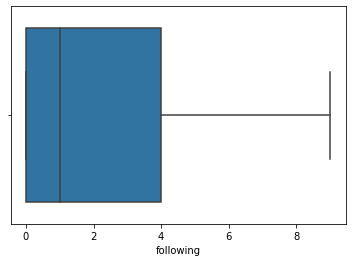

In [17]:
sns.boxplot(x=df_annotated_users_included['following'], showfliers = False)
df_annotated_users_included.sort_values('following', ascending=False).head(10)
